In [6]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


# D3 from alignments

In [163]:
pd.set_option('display.max_rows', 500)

path = "/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_res.csv"
df = pd.read_csv(path)

df["abs_z_score"] = abs(df["D3_mean"] / df["D3_stdev"])
df["abs_D3_diff"] = abs(df["D3_mean"]) - abs(df["D3"])

# df_abnormal = df[(df["locus_length"] == 500) & (df["scale"] == "long") &  (df["D3_pval"] < 0.05)]
df_abnormal = df[(df["locus_length"] == 500) & (df["scale"] == "long") &  (df["D3_pval"] < 0.05)]



<AxesSubplot:xlabel='D3_mean', ylabel='Count'>

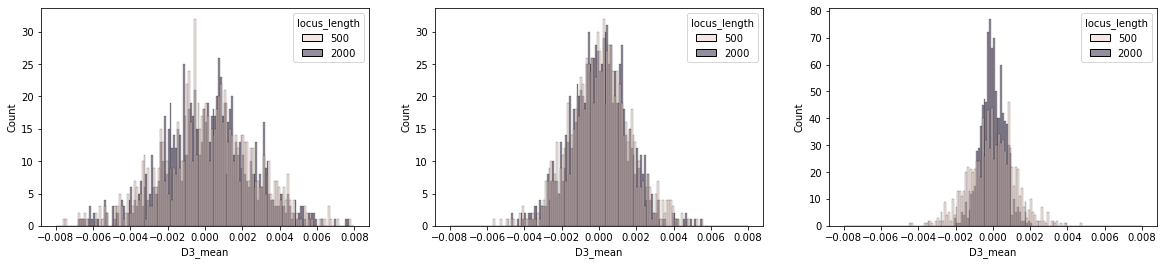

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.histplot(x="D3_mean", data=df[df["scale"] == "short"], hue="locus_length", binwidth=0.0001, binrange=(-0.008, 0.008), ax = axes[0])
sns.histplot(x="D3_mean", data=df[df["scale"] == "medium"], hue="locus_length", binwidth=0.0001, binrange=(-0.008, 0.008), ax = axes[1])
sns.histplot(x="D3_mean", data=df[df["scale"] == "long"], hue="locus_length", binwidth=0.0001, binrange=(-0.008, 0.008), ax = axes[2])


<AxesSubplot:xlabel='abs_D3_diff', ylabel='Count'>

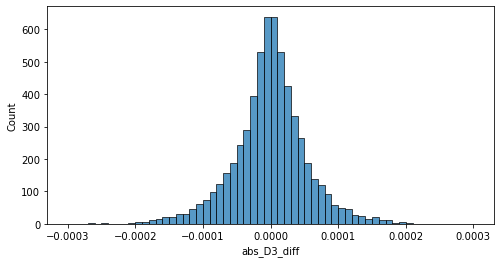

In [164]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="abs_D3_diff", data=df, binwidth=0.00001, binrange=(-0.0003, 0.0003), ax = axes)

In [165]:
print((df["abs_D3_diff"] > 0).sum())
print((df["abs_D3_diff"] <= 0).sum())

3009
2991


<AxesSubplot:xlabel='abs_D3_diff', ylabel='Count'>

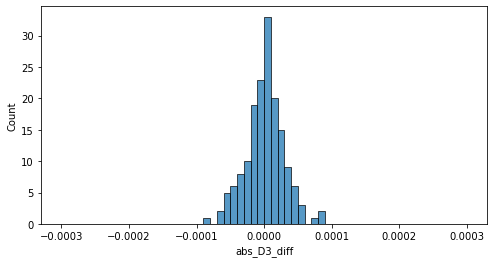

In [166]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="abs_D3_diff", data=df_abnormal, binwidth=0.00001, binrange=(-0.0003, 0.0003), ax = axes)


In [167]:
print((df_abnormal["abs_D3_diff"] > 0).sum())
print((df_abnormal["abs_D3_diff"] <= 0).sum())

89
74


In [168]:
df[df["scale"] == "long"]

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id,abs_z_score,abs_D3_diff
4000,4000,0,L_0,C_0,R_0,-0.000622,-0.000599,0.001080,0.579037,long,500,1,0.554791,-0.000023
4001,4001,1,L_0,C_0,Q_0,-0.000162,-0.000200,0.001079,0.852620,long,500,1,0.185776,0.000039
4002,4002,2,L_0,C_0,G_0,0.000208,0.000196,0.000712,0.782556,long,500,1,0.275990,-0.000011
4003,4003,3,L_0,R_0,Q_0,0.000476,0.000429,0.000920,0.640644,long,500,1,0.466799,-0.000047
4004,4004,4,L_0,R_0,G_0,-0.000145,-0.000126,0.001067,0.905977,long,500,1,0.118114,-0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,5,Q_0,R_0,G_0,0.000399,0.000396,0.000357,0.267346,long,2000,100,1.109195,-0.000004
5996,5996,6,C_0,L_0,R_0,0.000483,0.000453,0.000884,0.608167,long,2000,100,0.512691,-0.000031
5997,5997,7,C_0,L_0,G_0,-0.000132,-0.000134,0.000402,0.739094,long,2000,100,0.333053,0.000002
5998,5998,8,C_0,R_0,G_0,-0.000392,-0.000369,0.000423,0.382663,long,2000,100,0.872999,-0.000023


In [169]:
df_abnormal

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id,abs_z_score,abs_D3_diff
4060,4060,0,Q_0,C_0,L_0,0.002058,0.002076,0.001057,4.957505e-02,long,500,4,1.963612,1.802620e-05
4082,4082,2,R_0,G_0,Q_0,-0.001506,-0.001518,0.000640,1.772033e-02,long,500,5,2.371411,1.165026e-05
4085,4085,5,R_0,L_0,Q_0,-0.002011,-0.002051,0.000845,1.521138e-02,long,500,5,2.427307,4.006679e-05
4109,4109,9,R_0,L_0,C_0,0.002210,0.002216,0.001089,4.183419e-02,long,500,6,2.035166,6.031239e-06
4221,4221,1,C_0,Q_0,R_0,-0.001800,-0.001786,0.000639,5.195965e-03,long,500,12,2.794627,-1.482104e-05
4226,4226,6,Q_0,G_0,R_0,-0.001676,-0.001697,0.000645,8.537601e-03,long,500,12,2.630035,2.157288e-05
4228,4228,8,Q_0,R_0,L_0,-0.002159,-0.002164,0.000845,1.046823e-02,long,500,12,2.559966,5.331083e-06
4240,4240,0,L_0,Q_0,C_0,0.003631,0.003658,0.001060,5.592124e-04,long,500,13,3.450662,2.642167e-05
4241,4241,1,L_0,Q_0,G_0,0.002948,0.002957,0.001110,7.718027e-03,long,500,13,2.664162,9.065227e-06
4244,4244,4,L_0,C_0,R_0,0.003911,0.003861,0.001098,4.375166e-04,long,500,13,3.516354,-5.090380e-05


In [170]:
df_abnormal[(df_abnormal["id"] == 93) | (df_abnormal["id"] == 95) | (df_abnormal["id"] == 96)]

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id,abs_z_score,abs_D3_diff
5841,5841,1,G_0,L_0,C_0,-0.003251,-0.003241,0.000728,0.000009,long,500,93,4.449114,-0.000010
5842,5842,2,G_0,L_0,R_0,-0.003069,-0.003077,0.001128,0.006380,long,500,93,2.727591,0.000007
5843,5843,3,G_0,Q_0,C_0,-0.002621,-0.002615,0.000743,0.000433,long,500,93,3.519023,-0.000007
5844,5844,4,G_0,Q_0,R_0,-0.001918,-0.001900,0.000650,0.003467,long,500,93,2.923018,-0.000018
5845,5845,5,G_0,C_0,R_0,-0.002764,-0.002780,0.000709,0.000088,long,500,93,3.922614,0.000016
5847,5847,7,L_0,Q_0,R_0,-0.001968,-0.001956,0.000842,0.020106,long,500,93,2.324365,-0.000011
5848,5848,8,L_0,C_0,R_0,-0.002583,-0.002577,0.001119,0.021263,long,500,93,2.303276,-0.000006
5849,5849,9,Q_0,C_0,R_0,-0.002061,-0.002026,0.000679,0.002856,long,500,93,2.982815,-0.000035
5885,5885,5,L_0,G_0,C_0,0.001484,0.001519,0.000771,0.048790,long,500,95,1.970420,0.000034
5886,5886,6,Q_0,R_0,G_0,-0.001434,-0.001438,0.000625,0.021398,long,500,95,2.300888,0.000003


In [171]:
df_abnormal.shape

(163, 14)

In [172]:
df_abnormal[(df_abnormal["id"] == 93) | (df_abnormal["id"] == 95) | (df_abnormal["id"] == 96)].shape

(14, 14)

## Remedy 1
draw bootstrap samples of size n − 1

In [173]:
path = "/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_res_sub_ab1.csv"
df_ab_1 = pd.read_csv(path)
df_ab_1[df_ab_1["D3_pval"] < 0.05]

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id
1,1,1,Q_0,G_0,C_0,-0.002621,-0.002632,0.000743,0.000396,long,500,93
2,2,2,Q_0,G_0,R_0,-0.001918,-0.001937,0.000667,0.003696,long,500,93
4,4,4,Q_0,L_0,R_0,-0.001968,-0.001966,0.000849,0.020555,long,500,93
5,5,5,Q_0,C_0,R_0,-0.002061,-0.002082,0.000660,0.001621,long,500,93
6,6,6,G_0,L_0,C_0,-0.003251,-0.003269,0.000729,0.000007,long,500,93
7,7,7,G_0,L_0,R_0,-0.003069,-0.003003,0.001081,0.005460,long,500,93
8,8,8,G_0,C_0,R_0,-0.002764,-0.002760,0.000701,0.000082,long,500,93
9,9,9,L_0,C_0,R_0,-0.002583,-0.002557,0.001076,0.017479,long,500,93
11,11,1,G_0,Q_0,C_0,0.001611,0.001572,0.000779,0.043645,long,500,95
12,12,2,G_0,Q_0,R_0,-0.001434,-0.001386,0.000652,0.033554,long,500,95


In [174]:
df_ab_1[df_ab_1["id"] == 95]


,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id
10,10,0,G_0,Q_0,L_0,-0.000641,-0.000618,0.001218,0.612050,long,500,95
11,11,1,G_0,Q_0,C_0,0.001611,0.001572,0.000779,0.043645,long,500,95
12,12,2,G_0,Q_0,R_0,-0.001434,-0.001386,0.000652,0.033554,long,500,95
13,13,3,G_0,L_0,C_0,0.001484,0.001469,0.000772,0.057026,long,500,95
14,14,4,G_0,L_0,R_0,-0.000794,-0.000794,0.001182,0.501389,long,500,95
15,15,5,G_0,C_0,R_0,0.002151,0.002144,0.000745,0.003983,long,500,95
16,16,6,Q_0,L_0,C_0,-0.000768,-0.000752,0.001259,0.550088,long,500,95
17,17,7,Q_0,L_0,R_0,-0.001616,-0.001603,0.000837,0.055539,long,500,95
18,18,8,Q_0,C_0,R_0,-0.000894,-0.000872,0.000665,0.190107,long,500,95
19,19,9,L_0,C_0,R_0,-0.000127,-0.000133,0.001141,0.907426,long,500,95


In [152]:
df_ab_1[df_ab_1["D3_pval"] < 0.05].shape

(13, 12)


# Remedy 2

In [150]:
path = "/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_res_sub_ab_bootknife.csv"
df_ab_2 = pd.read_csv(path)
df_ab_2[df_ab_2["D3_pval"] < 0.05]


,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id
0,0,0,L_0,G_0,R_0,-0.003069,-0.003083,0.001114,0.005641,long,500,93
2,2,2,L_0,G_0,C_0,-0.003251,-0.003301,0.000726,0.000005,long,500,93
3,3,3,L_0,R_0,Q_0,0.001968,0.001911,0.000840,0.022978,long,500,93
4,4,4,L_0,R_0,C_0,-0.002583,-0.002610,0.001117,0.019471,long,500,93
6,6,6,G_0,R_0,Q_0,0.001918,0.001922,0.000647,0.002962,long,500,93
7,7,7,G_0,R_0,C_0,-0.002764,-0.002821,0.000732,0.000117,long,500,93
8,8,8,G_0,Q_0,C_0,-0.002621,-0.002580,0.000707,0.000261,long,500,93
9,9,9,R_0,Q_0,C_0,0.002061,0.002044,0.000660,0.001940,long,500,93
10,10,0,R_0,Q_0,L_0,0.001616,0.001697,0.000804,0.034805,long,500,95
11,11,1,R_0,Q_0,G_0,0.001434,0.001472,0.000636,0.020680,long,500,95


In [3]:
df_ab_2[df_ab_2["D3_pval"] < 0.05].shape

NameError: name 'df_ab_2' is not defined

# Remedy change window size to locus_length

In [4]:
path = "/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_res_sub_500.csv"
df_ab_2 = pd.read_csv(path)
df_ab_2[df_ab_2["D3_pval"] < 0.05]

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id
0,0,0,G_0,Q_0,C_0,-0.002621,-0.002667,0.000667,0.000064,long,500,93
1,1,1,G_0,Q_0,R_0,-0.001918,-0.001926,0.000625,0.002054,long,500,93
3,3,3,G_0,C_0,R_0,-0.002764,-0.002770,0.000693,0.000065,long,500,93
4,4,4,G_0,C_0,L_0,-0.003251,-0.003258,0.000673,0.000001,long,500,93
5,5,5,G_0,R_0,L_0,0.003069,0.003064,0.001119,0.006198,long,500,93
6,6,6,Q_0,C_0,R_0,-0.002061,-0.002091,0.000627,0.000859,long,500,93
8,8,8,Q_0,R_0,L_0,-0.001968,-0.001969,0.000835,0.018386,long,500,93
9,9,9,C_0,R_0,L_0,0.002583,0.002598,0.001101,0.018310,long,500,93
13,13,3,L_0,G_0,C_0,0.001484,0.001488,0.000733,0.042454,long,500,95
16,16,6,R_0,G_0,C_0,0.002151,0.002151,0.000723,0.002931,long,500,95


In [5]:
df_ab_2[df_ab_2["D3_pval"] < 0.05].shape

(14, 12)

# Remedy 3

In [9]:
path="/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_res_sub_ab_2stage.csv"

In [10]:
df_ab_3 = pd.read_csv(path)
df_ab_3[df_ab_3["D3_pval"] < 0.05]

,Unnamed: 0,Unnamed: 0.1,A,B,C,D3,D3_mean,D3_stdev,D3_pval,scale,locus_length,id
2,2,2,C_0,L_0,G_0,0.003251,0.003230,0.000982,0.001000,long,500,93
3,3,3,C_0,R_0,Q_0,0.002061,0.002080,0.000896,0.020224,long,500,93
4,4,4,C_0,R_0,G_0,0.002764,0.002769,0.000943,0.003327,long,500,93
5,5,5,C_0,Q_0,G_0,0.002621,0.002602,0.000950,0.006176,long,500,93
7,7,7,L_0,R_0,G_0,-0.003069,-0.003047,0.001419,0.031717,long,500,93
9,9,9,R_0,Q_0,G_0,0.001918,0.001941,0.000877,0.026910,long,500,93
13,13,3,G_0,C_0,R_0,0.002151,0.002212,0.001005,0.027664,long,500,95
23,23,3,R_0,G_0,L_0,-0.002789,-0.002797,0.001410,0.047261,long,500,96


In [11]:
df_ab_3[df_ab_3["D3_pval"] < 0.05].shape

(8, 12)

(-0.006, 0.006)

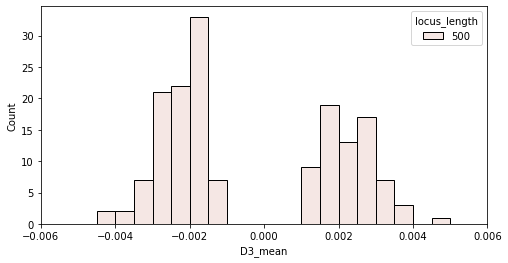

In [143]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_mean", hue="locus_length",data=df_abnormal, binwidth=0.0005, binrange=(-0.006, 0.006), ax = axes)
axes.set_xlim(-0.006, 0.006)

<AxesSubplot:xlabel='D3_stdev', ylabel='Count'>

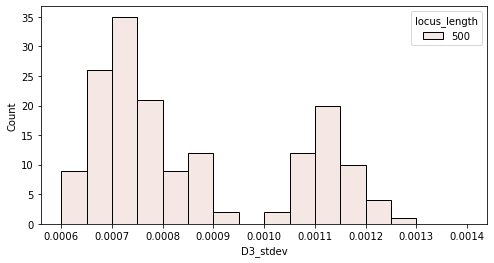

In [144]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_stdev", hue="locus_length",data=df_abnormal, binwidth=0.00005,binrange=(0.0006, 0.0014), ax = axes)

In [99]:
def calc_triplet_abnormal_cnt():
    triplet_abnormal_cnt = {}
    for index, row in df_abnormal.iterrows():
        tri = [row['A'], row['B'], row['C']]
        tri.sort()
    #     print(tri)
        if tuple(tri) in triplet_abnormal_cnt.keys():
            triplet_abnormal_cnt[tuple(tri)] += 1
        else:
            triplet_abnormal_cnt[tuple(tri)] = 0
    print(triplet_abnormal_cnt)
    return triplet_abnormal_cnt

In [100]:
calc_triplet_abnormal_cnt()

{('L_0', 'Q_0', 'R_0'): 7, ('C_0', 'G_0', 'Q_0'): 8, ('G_0', 'Q_0', 'R_0'): 5, ('C_0', 'G_0', 'R_0'): 6, ('C_0', 'Q_0', 'R_0'): 1, ('C_0', 'G_0', 'L_0'): 5, ('C_0', 'L_0', 'Q_0'): 6, ('G_0', 'L_0', 'R_0'): 2, ('G_0', 'L_0', 'Q_0'): 3, ('C_0', 'L_0', 'R_0'): 2}


{('L_0', 'Q_0', 'R_0'): 7,
 ('C_0', 'G_0', 'Q_0'): 8,
 ('G_0', 'Q_0', 'R_0'): 5,
 ('C_0', 'G_0', 'R_0'): 6,
 ('C_0', 'Q_0', 'R_0'): 1,
 ('C_0', 'G_0', 'L_0'): 5,
 ('C_0', 'L_0', 'Q_0'): 6,
 ('G_0', 'L_0', 'R_0'): 2,
 ('G_0', 'L_0', 'Q_0'): 3,
 ('C_0', 'L_0', 'R_0'): 2}

(-0.01, 0.01)

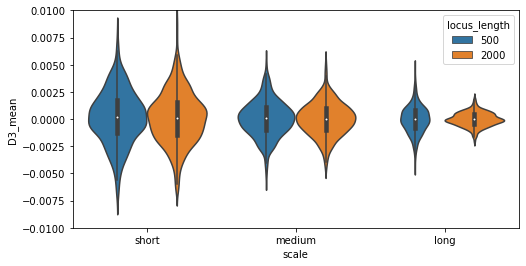

In [101]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="D3_mean", x="scale", hue="locus_length",data=df, ax = axes)
axes.set_ylim(-0.01, 0.01)

<AxesSubplot:xlabel='D3_mean', ylabel='Count'>

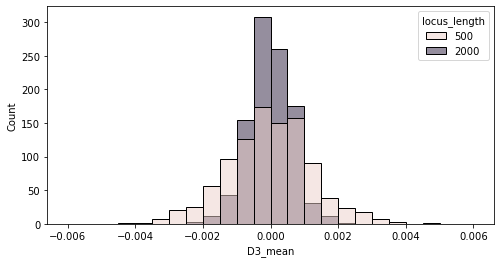

In [175]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_mean", hue="locus_length",data=df[df["scale"]=="long"], binwidth=0.0005, binrange=(-0.006, 0.006), ax = axes)
# axes.set_ylim(-0.01, 0.01)
# sns.histplot(x="D3_stdev", hue="locus_length",data=df_abnormal, binwidth=0.00005,binrange=(0.0006, 0.0014), ax = axes)

(-0.0, 0.004)

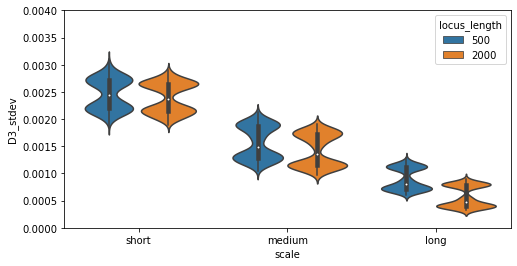

In [70]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="D3_stdev", x="scale", hue="locus_length",data=df, ax = axes, outlier=True)
axes.set_ylim(-0.0, 0.004)

<AxesSubplot:xlabel='D3_stdev', ylabel='Count'>

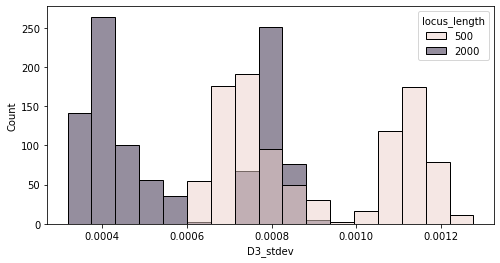

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_stdev", hue="locus_length",data=df[df["scale"]=="long"], ax = axes)

In the abnormal case, more D3/D3_mean values are away from 0, while in the true case, the D3/D3_mean are highly overlapped for 2000 and 500 bps. 


In [39]:
p_value = 2 * norm.sf(1.96) 
p_value

0.04999579029644087

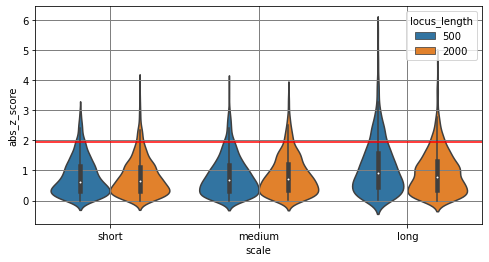

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="abs_z_score", x="scale", hue="locus_length", data=df, ax = axes, outlier=True)
# axes.set_ylim(-0.0, 0.004)
plt.grid(color='gray', linestyle='-', linewidth=1)
axes.axhline(y=1.96, color='r', linestyle='-')

In [90]:
pdist_df_all = pd.read_csv("/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/long/pdist_heter_500.csv")
for i in range(90, 95+1):
    pdist_df=pdist_df_all[pdist_df_all["replicate"]==i]
    d_lg=np.sum(pdist_df[(pdist_df["species_i_j"]=="L_0-G_0")|(pdist_df["species_i_j"]=="G_0-L_0")]["p-distance"])
    d_lc=np.sum(pdist_df[(pdist_df["species_i_j"]=="L_0-C_0")|(pdist_df["species_i_j"]=="C_0-L_0")]["p-distance"])
    d_gc=np.sum(pdist_df[(pdist_df["species_i_j"]=="G_0-C_0")|(pdist_df["species_i_j"]=="C_0-G_0")]["p-distance"])

    print(i, d_lg, d_lc, d_gc)
    D3=(d_lg-d_lc)/(d_lg+d_lc)
    print(D3)

90 545.096 546.8360000000001 284.69000000000005
-0.0015935058227070206
91 548.488 547.768 282.36600000000004
0.0006567808978924879
92 545.4440000000001 545.4140000000001 285.80600000000004
2.7501287976961904e-05
93 542.106 545.642 283.3380000000001
-0.003250752931745274
94 549.744 548.894 284.014
0.0007736852357191566
95 546.4560000000001 544.836 283.796
0.001484478947889399


In [86]:
D3=(d_lg-d_lc)/(d_lg+d_lc)
D3

0.001484478947889399

In [91]:
pdist_df_all = pd.read_csv("/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/long/pdist_heter_2000.csv")
for i in range(90, 95+1):
    pdist_df=pdist_df_all[pdist_df_all["replicate"]==i]
    d_lg=np.sum(pdist_df[(pdist_df["species_i_j"]=="L_0-G_0")|(pdist_df["species_i_j"]=="G_0-L_0")]["p-distance"])
    d_lc=np.sum(pdist_df[(pdist_df["species_i_j"]=="L_0-C_0")|(pdist_df["species_i_j"]=="C_0-L_0")]["p-distance"])
    d_gc=np.sum(pdist_df[(pdist_df["species_i_j"]=="G_0-C_0")|(pdist_df["species_i_j"]=="C_0-G_0")]["p-distance"])

    print(i, d_lg, d_lc, d_gc)
    D3=(d_lg-d_lc)/(d_lg+d_lc)
    print(D3)

90 547.4865 546.9385 283.6775
0.0005007195559311985
91 547.7665000000001 547.1865 284.3935
0.0005297031014116962
92 544.147 544.9945 283.4985
-0.0007781358069635287
93 546.599 547.081 283.08850000000007
-0.00044071391997656614
94 546.2520000000001 547.0350000000001 287.39700000000005
-0.0007161888872729808
95 545.5804999999999 546.8344999999999 284.6355
-0.001147915398452071


500 bps alignments data have p-distances between taxa that varied more.

# D3 from true gt


In [54]:
path = "/Users/zhen/Desktop/Zhen/research/phylogenetics/X2/data/simulation/scale_ingroup_half_popsize/net0/D3_gt_res.csv"
df = pd.read_csv(path)

df["abs_z_score"] = abs(df["D3_mean"] / df["D3_stdev"])
df_abnormal = df[(df["locus_length"] == 500) & (df["scale"] == "long") &  (df["D3_pval"] < 0.05)]

(-0.01, 0.01)

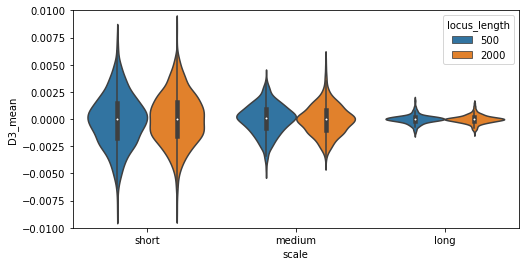

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="D3_mean", x="scale", hue="locus_length",data=df, ax = axes)
axes.set_ylim(-0.01, 0.01)

<AxesSubplot:xlabel='D3_mean', ylabel='Count'>

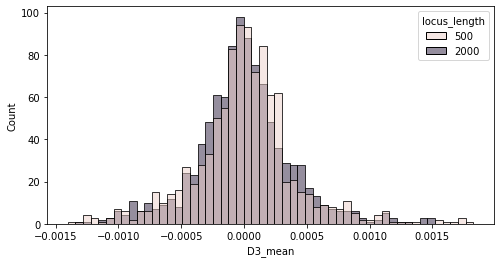

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_mean", hue="locus_length",data=df[df["scale"]=="long"], ax = axes)

(-0.0, 0.004)

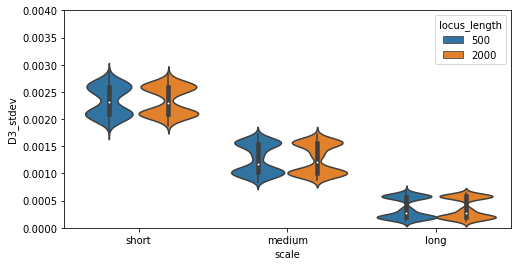

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="D3_stdev", x="scale", hue="locus_length",data=df, ax = axes, outlier=True)
axes.set_ylim(-0.0, 0.004)

<AxesSubplot:xlabel='D3_stdev', ylabel='Count'>

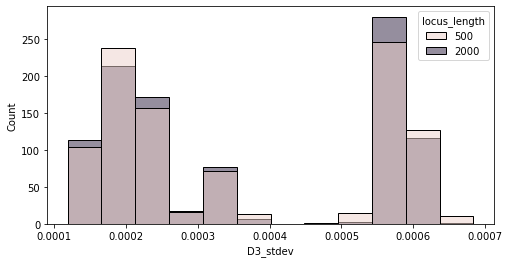

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(x="D3_stdev", hue="locus_length",data=df[df["scale"]=="long"], ax = axes)

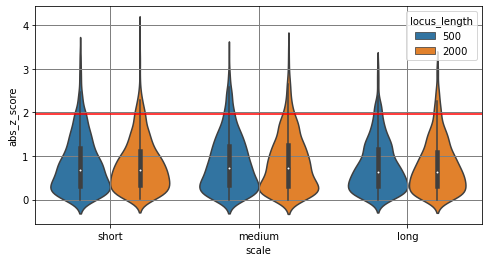

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.violinplot(y="abs_z_score", x="scale", hue="locus_length", data=df, ax = axes, outlier=True)
# axes.set_ylim(-0.0, 0.004)
plt.grid(color='gray', linestyle='-', linewidth=1)
axes.axhline(y=1.96, color='r', linestyle='-')